Original population: [(-3.7021221047078954, 3.380517786786484), (-3.1412117086485765, -2.302178542315757), (2.5955758781142, -5.233643276736176), (4.503138091729902, -2.938288583781116)]

Best fitness at generation 50: Individual: (2.882918282637038, -5.554117320817918) • Fitness: -0.025432406910695905;
Best fitness at generation 100: Individual: (2.6048970843058212, -5.664309729539862) • Fitness: -0.04859372057348508;
Best fitness at generation 150: Individual: (2.7041706006117785, -5.810509046246762) • Fitness: 0.22656226470946011;
Best fitness at generation 200: Individual: (3.0747145633112627, -5.765601587452335) • Fitness: 0.4009184075773166;
Best fitness at generation 250: Individual: (2.894815715145617, -5.924042388304288) • Fitness: 0.5254615761049893;
Best fitness at generation 300: Individual: (2.799173370027959, -5.910671771729887) • Fitness: 0.468682885142735;
Best fitness at generation 350: Individual: (2.9878306857296284, -5.713042129836459) • Fitness: 0.36153794883046875

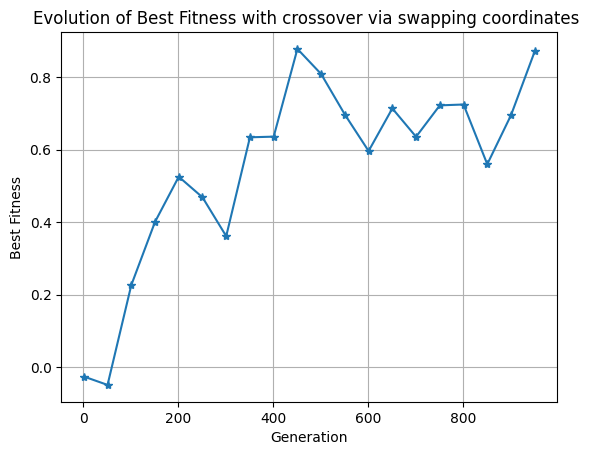

In [110]:
import numpy as np
import math
from math import sin
import random
import matplotlib.pyplot as plt

# VARIATION 1 (crossover by elitism)
# STEP 1 ~~~~~~~~~~~~~~~~~~~~~~
# Generate the initial population

# Fitness function
def fitness(x, y):
    return np.sin(math.sqrt(x**2 + y**2))

# Generate population
def generate_population(population_size):
    population = []
    for _ in range(population_size):
        x = random.uniform(-6, 6)
        y = random.uniform(-6, 6)
        population.append((x, y))
    return population

def selection(population, n_parents):
    sorted_population = sorted(population, key=lambda ind: fitness(ind[0], ind[1]), reverse=True)
    return sorted_population[:n_parents]

def crossover(parents): # crossover by switching the y-coordinate of elite parents
  parent1, parent2 = parents[0], parents[1]
  offspring = [] # since tuples are immutable, must create new ones
  offspring.append((parent1[0],parent2[1]))
  offspring.append((parent2[0],parent1[1]))
  return offspring

def mutate(offspring):
  mutationRate = 0.5
  mutatedOffspring = []
  for individual in offspring:
    x, y = individual
    if random.random() < mutationRate:
      # Apply mutation by adding a small random value to each coordinate
          mutated_x = x + random.uniform(-0.1, 0.1)
          mutated_y = y + random.uniform(-0.1, 0.1)

          # Ensure the mutated values stay within the range of -6 and 6
          mutated_x = max(min(mutated_x, 6), -6)
          mutated_y = max(min(mutated_y, 6), -6)

          mutatedOffspring.append((mutated_x, mutated_y))
    else:
          mutatedOffspring.append((x, y))
  return mutatedOffspring


populationSize = 4
population = generate_population(populationSize)
numGenerations = 1000
currentGeneration = 0

print(f"Original population: {population}\n")

# STEP 2 ~~~~~~~~~~~~~~~~~~~~~~
# Find the fitness of each individual within the population, using the fitness function. This iteration we will use ELITEST to choose parents

fitnessValues = []
for individual in population:
  fitnessValues.append(fitness(individual[0], individual[1]))
fitnessValues.sort(reverse = True) # sort so that the best offspring are first in the array
# print(f"Fitness values: {fitnessValues}\n")


# Create a list of tuples to associate each fitness value with its corresponding individual (x, y) pair
fitness_pairs_named = [(f'Individual {i}', individual, fitness_value) for i, (individual, fitness_value) in enumerate(zip(population, fitnessValues))]

# Sort the list of tuples based on fitness values (in descending order)
fitness_pairs_named.sort(key=lambda triple: triple[2], reverse=True)

# STEP 3 ~~~~~~~~~~~~~~~~~~~~~~
# While <= 1000 generations
# Perform crossover(Elitist), random mutations on the offspring, and replace the worst (x,y) values with the offspring
# Every 50 generations, print out what the best fit (x,y) is along with what fitness it is


generationNumbers = [] # used to keep track of number of passed generations so that they can be used on the 2D visualization
while (currentGeneration <= numGenerations):
  bestParents = selection(population, 2)
  offspring = crossover(bestParents)
  mutations = mutate(offspring)
  for i, mutated_individual in zip([2, 3], mutations):
    fitness_pairs_named[i] = (f'Individual {i}', mutated_individual, fitness(mutated_individual[0], mutated_individual[1]))
    population[i] = ((mutated_individual[0], mutated_individual[1])) # update the old population with the new values
  if ((currentGeneration + 1) % 50 == 0):
    best_fitness = max(fitness_pairs_named, key=lambda x: x[2])[2]
    best_individual = max(fitness_pairs_named, key=lambda x: x[1])[1] # used when showcasing best fit every 50 generations
    generationNumbers.append(best_fitness)
    print(f"Best fitness at generation {currentGeneration + 1}: Individual: {best_individual} • Fitness: {best_fitness};")
  currentGeneration += 1


plt.plot(range(1, numGenerations + 1, 50), generationNumbers, marker = '*')  # Adjust x-axis to show every 50 generations
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness with crossover via swapping coordinates ')
plt.grid(True)
plt.show()



Original population: [(-5.086385017318134, 4.150979989395829), (-5.8779828757866, 2.7217418337862664), (4.75956555991281, 4.772142121828658), (1.1489341036254785, -2.602019672172728)]

Best fitness at generation 50: Individual: (-3.1412117086485765, -2.302178542315757) • Fitness: 0.780750129151423;
Best fitness at generation 100: Individual: (-3.1412117086485765, -2.302178542315757) • Fitness: 0.8376222119366323;
Best fitness at generation 150: Individual: (-3.1412117086485765, -2.302178542315757) • Fitness: 0.9561045980061416;
Best fitness at generation 200: Individual: (-3.1412117086485765, -2.302178542315757) • Fitness: 0.9251847792608783;
Best fitness at generation 250: Individual: (-3.1412117086485765, -2.302178542315757) • Fitness: 0.9794230432795876;
Best fitness at generation 300: Individual: (-3.1412117086485765, -2.302178542315757) • Fitness: 0.8976266130400734;
Best fitness at generation 350: Individual: (-3.1412117086485765, -2.302178542315757) • Fitness: 0.8333562038946642

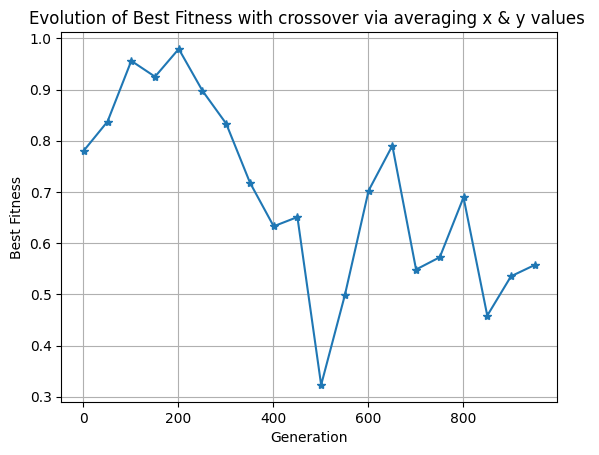

In [111]:
# VARIATION 2
def crossoverV2(parents):
    parent1, parent2 = parents[0], parents[1]
    offspring = []
    for i in range(2):  # Create 2 offspring
        offspring_x = random.choice([parent1[0], parent2[0]])
        offspring_y = random.choice([parent1[1], parent2[1]])
        offspring.append((offspring_x, offspring_y))
    return offspring


population = generate_population(4)
currentGeneration = 0

print(f"Original population: {population}\n")

generationNumbers = []
while (currentGeneration <= numGenerations):
  bestParents = selection(population, 2)
  offspring = crossoverV2(bestParents)
  mutations = mutate(offspring)
  for i, mutated_individual in zip([2, 3], mutations):
    fitness_pairs_named[i] = (f'Individual {i}', mutated_individual, fitness(mutated_individual[0], mutated_individual[1]))
    population[i] = ((mutated_individual[0], mutated_individual[1]))
  if ((currentGeneration + 1) % 50 == 0):
    best_fitness = max(fitness_pairs_named, key=lambda x: x[2])[2]
    best_individual = max(fitness_pairs_named, key=lambda x: x[1])[1]
    generationNumbers.append(best_fitness)
    print(f"Best fitness at generation {currentGeneration + 1}: Individual: {best_individual} • Fitness: {best_fitness};")
  currentGeneration += 1

plt.plot(range(1, numGenerations + 1, 50), generationNumbers, marker = '*')  # Adjust x-axis to show every 50 generations
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness with crossover via averaging x & y values ')
plt.grid(True)
plt.show()

Original population: [(2.3313539733182953, 5.638543545686453), (3.369737569479696, -5.151220533723986), (-1.5095974677704191, -0.2862306204779692), (-4.029151665495664, 2.835158543744015)]

Best fitness at generation 50: Individual: (6, -5.978238667593686) • Fitness: 0.8162387568568314;
Best fitness at generation 100: Individual: (5.391430804233238, -5.814728902161107) • Fitness: 0.9971420926319842;
Best fitness at generation 150: Individual: (5.717890888398996, -5.853594056537869) • Fitness: 0.9464122747714763;
Best fitness at generation 200: Individual: (4.029674821243283, -5.501733879303336) • Fitness: 0.5110834258075235;
Best fitness at generation 250: Individual: (5.33470802833749, -4.768335077503878) • Fitness: 0.7655924426683328;
Best fitness at generation 300: Individual: (3.7770975572876706, -5.395045483143597) • Fitness: 0.46754830990472324;
Best fitness at generation 350: Individual: (5.700686524918131, -4.783872883595105) • Fitness: 0.916326505040612;
Best fitness at genera

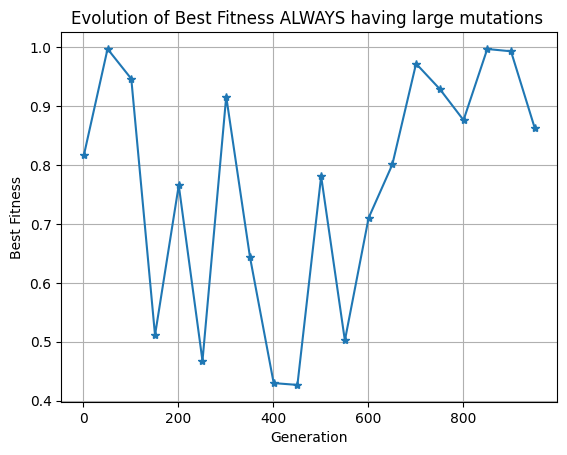

In [112]:
# VARIATION 3
def mutateV2(offspring): # Adjusting mutate so that it ALWAYS mutates either in a positive or negative direction
  mutationRate = -1
  mutatedOffspring = []
  for individual in offspring:
    x, y = individual
    if random.random() > mutationRate:
      # Apply mutation by adding a small random value to each coordinate
          mutated_x = x + random.uniform(-1, 1)
          mutated_y = y + random.uniform(-1, 1)

          # Ensure the mutated values stay within the range of -6 and 6
          mutated_x = max(min(mutated_x, 6), -6)
          mutated_y = max(min(mutated_y, 6), -6)

          mutatedOffspring.append((mutated_x, mutated_y))
    else:
          mutatedOffspring.append((x, y))
  return mutatedOffspring

population = generate_population(4)
currentGeneration = 0

print(f"Original population: {population}\n")

generationNumbers = []
while (currentGeneration <= numGenerations):
  bestParents = selection(population, 2)
  offspring = crossover(bestParents)
  mutations = mutateV2(offspring)
  for i, mutated_individual in zip([2, 3], mutations):
    fitness_pairs_named[i] = (f'Individual {i}', mutated_individual, fitness(mutated_individual[0], mutated_individual[1]))
    population[i] = ((mutated_individual[0], mutated_individual[1]))
  if ((currentGeneration + 1) % 50 == 0):
    best_fitness = max(fitness_pairs_named, key=lambda x: x[2])[2]
    best_individual = max(fitness_pairs_named, key=lambda x: x[1])[1]
    generationNumbers.append(best_fitness)
    print(f"Best fitness at generation {currentGeneration + 1}: Individual: {best_individual} • Fitness: {best_fitness};")
  currentGeneration += 1

plt.plot(range(1, numGenerations + 1, 50), generationNumbers, marker = '*')  # Adjust x-axis to show every 50 generations
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness ALWAYS having large mutations ')
plt.grid(True)
plt.show()


Original population: [(5.461189350628823, 4.038385665524228), (-0.6234595509914929, 4.8365458637106755), (2.3501970883528394, -0.26822892788387165), (1.861697495712498, 5.126345432368307)]

Best fitness at generation 50: Individual: (5.542299390433117, 4.038385665524228) • Fitness: 0.6058393801008635;
Best fitness at generation 100: Individual: (5.533394271766266, 4.045681747687412) • Fitness: 0.6774961871390143;
Best fitness at generation 150: Individual: (5.462962159665474, 3.9936549779860844) • Fitness: 0.7313719051846341;
Best fitness at generation 200: Individual: (5.653381090194417, 4.038385665524228) • Fitness: 0.7167947980302468;
Best fitness at generation 250: Individual: (5.607848987173031, 4.038202183466836) • Fitness: 0.6796745762145229;
Best fitness at generation 300: Individual: (5.584866762942489, 4.107639692158496) • Fitness: 0.7952149466522348;
Best fitness at generation 350: Individual: (5.694748641881624, 4.224978209379844) • Fitness: 0.9222287057777592;
Best fitness

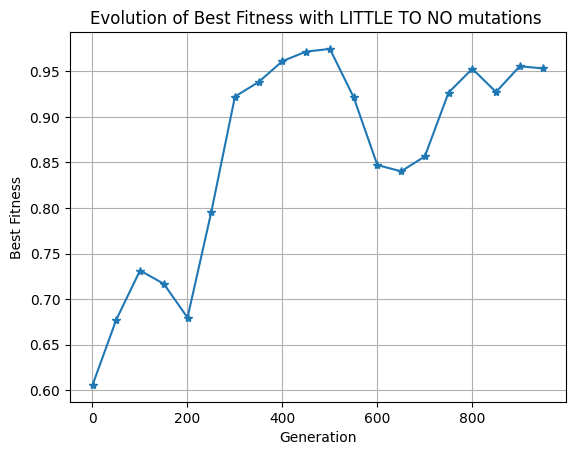

In [113]:
# VARIATION 4
def mutateV3(offspring): # Adjusting mutate so that there are LITTLE TO NO mutations
  mutationRate = .9
  mutatedOffspring = []
  for individual in offspring:
    x, y = individual
    if random.random() > mutationRate:
      # Apply mutation by adding a small random value to each coordinate
          mutated_x = x + random.uniform(-.1, .1)
          mutated_y = y + random.uniform(-.1, .1)

          # Ensure the mutated values stay within the range of -6 and 6
          mutated_x = max(min(mutated_x, 6), -6)
          mutated_y = max(min(mutated_y, 6), -6)

          mutatedOffspring.append((mutated_x, mutated_y))
    else:
          mutatedOffspring.append((x, y))
  return mutatedOffspring

population = generate_population(4)
currentGeneration = 0

print(f"Original population: {population}\n")

generationNumbers = []
while (currentGeneration <= numGenerations):
  bestParents = selection(population, 2)
  offspring = crossover(bestParents)
  mutations = mutateV3(offspring)
  for i, mutated_individual in zip([2, 3], mutations):
    fitness_pairs_named[i] = (f'Individual {i}', mutated_individual, fitness(mutated_individual[0], mutated_individual[1]))
    population[i] = ((mutated_individual[0], mutated_individual[1]))
  if ((currentGeneration + 1) % 50 == 0):
    best_fitness = max(fitness_pairs_named, key=lambda x: x[2])[2]
    best_individual = max(fitness_pairs_named, key=lambda x: x[1])[1]
    generationNumbers.append(best_fitness)
    print(f"Best fitness at generation {currentGeneration + 1}: Individual: {best_individual} • Fitness: {best_fitness};")
  currentGeneration += 1

plt.plot(range(1, numGenerations + 1, 50), generationNumbers, marker = '*')  # Adjust x-axis to show every 50 generations
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness with LITTLE TO NO mutations ')
plt.grid(True)
plt.show()

# Variation 1 (Elitist Selection & crossover via swapping coordinates)
Overall, selecting the 2 most elite individuals based on fitness and then swapping coordinates seemed to work well. There are some cases where sometimes the program stalls and gets stuck a little, but majority of the time it can go from .3 fitness all the way to .92 within the 1000 generations. This seemed to work well with the given mutation which was `+/- 0.1 with a 50% chance,` which gave the program some control of its own to be able to reach a higher fitness. I think in all though that **this algorithm was one of the most efficient of the 4 I worked with**


# Variation 2 (Crossover with averaging x & y values)
Similar to Variation 1, this can get stuck occasionally. However, it's similar to Variation 1 in that it has a great tendency of taking low fitness and working its way higher over time! I also find this one a little less complex and a far bit more random, as the averages during crossover are taken at random between the x and y values. Overall, `Variantion 1 & 2 are very good at being consistantly good.`

# Variation 3 (HIGHER rate of mutation, and larger mutations)
The other 2 variations so far have a 50% mutation rate at +/- 0.1 to the x and y values. This variation however has a `100% chance to mutate, and +/- 1` to the x and y values. As expected, this throws a lot of randomness into the genetic algorithm, and often throws the algorithm off track even if it's found a good solution to begin with. This leads to a very sporadic 2D visualization as the algorithm is constantly jumping from higher and lower fitness. While it still does its job sometimes, it's far less dependable and less efficient than variations 1 & 2.

# Variation 4 (SUPER LOW rate of mutation)
Removing the mutation, while sometimes leading to a standstill or non-optimal fitness values over time, does show the inherit strength of the algorithm. Like variations 1 & 2, this variation is still quite strong at getting low fitness populations up to a strong fitness. While it `loses` some of its flexibility to grow due to its lack of mutation, it `also loses` some of its chances at taking worse options on accident due to mutation. Overall, this variation is pretty ok!